## Treinamento e avaliação de redes convolucionais
### Função de custo [Fonte](https://github.com/llSourcell/loss_functions_explained)

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import tensorflow as tf
import os
import keras.backend as K
os.environ['CUDA_VISIBLE_DEVICES'] = "3"
config = tf.ConfigProto(device_count = {'GPU': 1})
config.gpu_options.per_process_gpu_memory_fraction = 0.2
sess = tf.Session(config=config)
K.set_session(sess)


Using TensorFlow backend.


## Função de Custo

Uma função de custo quantifica o quanto a saída da rede está próxima de uma saída prevista.

### Função de custo para regressão

#### Mean Squared Error Loss

In [43]:
def meansquarederror(ytrue,ypred):
    trainingexamples = ytrue.shape[0]
    print("total no of training examples is"+str(trainingexamples))
    errorvector = ypred-ytrue
    print("shape of error vector"+str(errorvector.shape))
    error = (1/trainingexamples)*np.sum(errorvector**2)
    return error

In [44]:
generate_training_sets = np.random.randn(100,1)

In [45]:
generate_training_sets_pred = np.random.randn(100,1)

In [46]:
meansquarederror(generate_training_sets, generate_training_sets_pred)

total no of training examples is100
shape of error vector(100, 1)


1.5110842927798385

#### Mean absolute percentage error loss

In [47]:
def meanabsolutepercentageloss(ytrue,ypred):
    trainingexamples = ytrue.shape[0]
    print("total no of training examples is"+str(trainingexamples))
    errorvector = 100*(np.abs(ypred-ytrue)/np.abs(ytrue))
    print("shape of error vector"+str(errorvector.shape))
    error = (1/trainingexamples)*np.sum(errorvector)
    return error

In [48]:
meanabsolutepercentageloss(generate_training_sets, generate_training_sets_pred)

total no of training examples is100
shape of error vector(100, 1)


295.6647833900092

### Função de custo para classificação

#### Hinge Loss

In [49]:
def hingeloss(ytrue,ypred):
    createarray =[]
    trainingexamples = ytrue.shape[0]
    createzeros = np.zeros(trainingexamples)
    print("total no of training examples is"+str(trainingexamples))
    errorvector=1-ypred*ytrue
    #print( errorvector)
    for i in errorvector:
        #print(i)
        if i >0:
            createarray.append(i)
        else:
            createarray.append(0)
    createarray = np.array(createarray)
    #print(createarray)
    #errorvector = np.maximum(createzeros,errorvector)
    print("shape of error vector"+str(createarray.shape))
    error = (1/trainingexamples)*np.sum(createarray)
    return error

In [50]:
hingeloss(generate_training_sets, generate_training_sets_pred)

total no of training examples is100
shape of error vector(100,)


array([0.99743163])

#### Logistic Loss

In [51]:
def sigmoid(arrays):
    return 1/(1+np.exp((-1)*arrays))

In [52]:
sigtrain=sigmoid(generate_training_sets)
sigpred=sigmoid(generate_training_sets_pred)

In [53]:
def logisticsloss(ytrue,ypred):
    trainingexamples = ytrue.shape[0]
    errorvector  = (ytrue*np.log(ypred))+(ytrue*np.log(1-ypred))
    return (1/trainingexamples)*np.sum(errorvector)

In [54]:
logisticsloss(sigtrain,sigpred)

-0.8149481278497267

#### Cross-entropy

In [55]:
def crossentropy(ytrue,ypred):
    trainingexamples = ytrue.shape[0]
    errorvector = -1 * ytrue * np.log(ypred)
    return (1/trainingexamples)*np.sum(errorvector)

In [56]:
crossentropy(sigtrain,sigpred)

0.3614340310365451

### Custom Loss in Keras

In [57]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense

#### CIFAR10 small image classification

Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [36]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

##### Mostrando imagens do dataset

In [37]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

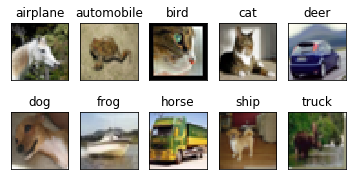

In [38]:
fig = plt.figure(figsize=(6,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    img_num = np.random.randint(idx.shape[0])
    im = x_train[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [39]:
# Convert and pre-processing
y_train_pre = to_categorical(y_train, num_classes)
y_test_pre = to_categorical(y_test, num_classes)

x_train_pre = x_train.astype('float32')
x_test_pre = x_test.astype('float32')

x_train_pre  /= 255
x_test_pre /= 255

In [58]:
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Model
#from keras_sequential_ascii import keras2ascii
from keras.optimizers import SGD

def backbone_model_simple_1(img_shape):
    input_layer = Input(shape=img_shape)
    
    x = Conv2D(32, (3,3), padding='same', activation='relu', name='backbone_conv1')(input_layer)
    x = Conv2D(32, (3,3), padding='same', activation='relu', name='backbone_conv2')(x)
    x = MaxPooling2D(pool_size=(2,2), name='backbone_max1')(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(64, (3,3), padding='same', activation='relu', name='backbone_conv3')(x)
    x = Conv2D(64, (3,3), padding='same', activation='relu', name='backbone_conv4')(x)
    output = MaxPooling2D(pool_size=(2,2), name='backbone_max2')(x)
    
    model = Model(inputs=input_layer, outputs=output, name="backbone_simple")
    
    return model

def backbone_model_simple_2(img_shape):
    input_layer = Input(shape=img_shape)
    x = input_layer
    for i in [32, 64, 128]:
        x = Conv2D(i, (3,3), 
                   padding='same', 
                   activation='relu', 
                   name='backbone_conv1_{}'.format(i))(x)
        x = Dropout(0.2,  name='dropout_{}'.format(i))(x)
        x = Conv2D(i, (3,3),
                   padding='same', 
                   activation='relu', 
                   name='backbone_conv2_{}'.format(i))(x)
        x = MaxPooling2D(pool_size=(2,2),
                         name='backbone_max1_{}'.format(i))(x)
    
    model = Model(inputs=input_layer, outputs=x, name="backbone_simple")
    
    return model


def get_model(img_shape, num_classes, backbone_model_fn):
    
    backbone = backbone_model_fn(img_shape)
    input_layer = Input(shape=img_shape)
    
    x = backbone(input_layer)
    x = Flatten(name='top_flatten1')(x)
    x = Dropout(0.2, name='top_dropout1')(x)
    x = Dense(1024, activation='relu', name='top_dense1')(x)
    x = Dropout(0.2, name='top_dropout2')(x)
    output = Dense(num_classes, activation='softmax', name='top_output')(x)
    
    model = Model(inputs=input_layer, outputs=output, name='net')
    
    return backbone,model
    
backbone, model = get_model(x_train.shape[1:], num_classes, backbone_model_simple_2)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
backbone_simple (Model)      (None, 4, 4, 128)         287008    
_________________________________________________________________
top_flatten1 (Flatten)       (None, 2048)              0         
_________________________________________________________________
top_dropout1 (Dropout)       (None, 2048)              0         
_________________________________________________________________
top_dense1 (Dense)           (None, 1024)              2098176   
_________________________________________________________________
top_dropout2 (Dropout)       (None, 1024)              0         
_________________________________________________________________
top_output (Dense)           (None, 10)                10250     
Total para

In [59]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_train = model.fit(x_train_pre, y_train_pre,
          batch_size=32,
          epochs=10,
          validation_data=(x_test_pre, y_test_pre),
          shuffle=True
         )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 45s 901us/step - loss: 2.3098 - acc: 0.1001 - val_loss: 2.3151 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 31s 623us/step - loss: 2.3096 - acc: 0.0989 - val_loss: 2.3108 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 31s 622us/step - loss: 2.3099 - acc: 0.0984 - val_loss: 2.3193 - val_acc: 0.1000
Epoch 4/10
 2624/50000 [>.............................] - ETA: 27s - loss: 2.3157 - acc: 0.0987

KeyboardInterrupt: 

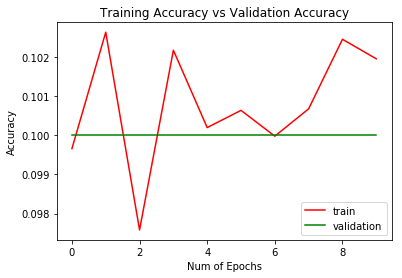

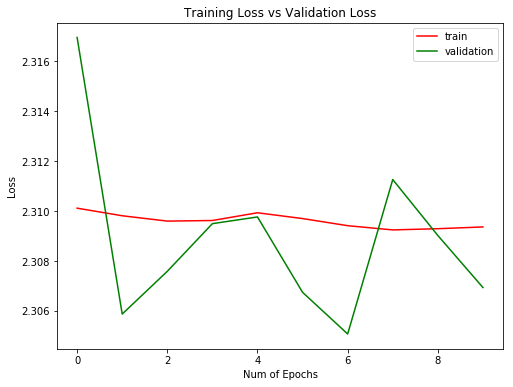

In [26]:
plt.figure(0)
plt.plot(model_train.history['acc'],'r')
plt.plot(model_train.history['val_acc'],'g')
#plt.xticks(np.arange(0, 40, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_train.history['loss'],'r')
plt.plot(model_train.history['val_loss'],'g')
#plt.xticks(np.arange(0, 40, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test_pre, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
#for ix in range(10):
#    print(ix, confusion_matrix(np.argmax(y_test_pre,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test_pre,axis=1),y_pred)
#print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10,7))

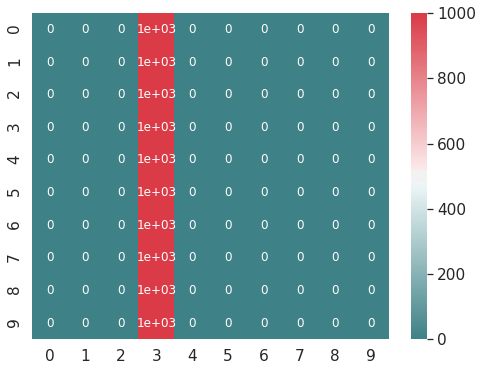

In [28]:
sn.set(font_scale=1.4)#for label size
cmap = sn.diverging_palette(200, 10, as_cmap=True)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cmap=cmap)# font size
plt.show()

### Referências

1. (https://github.com/llSourcell/loss_functions_explained)
2. (https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/)